In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator
import pandas as pd
from math import pi
import numpy as np

In [3]:
player_name = "Toni Kroos"

In [4]:
text = """Statistic	Per 90	Percentile
Non-Penalty Goals	0.06	50  
Non-Penalty xG	0.05	34  
Shots Total	1.21	67  
Assists	0.22	90  
xAG	0.17	85  
npxG + xAG	0.22	69  
Shot-Creating Actions	4.34	96  
Passes Attempted	101.42	99  
Pass Completion %	91.3%	98  
Progressive Passes	12.10	99  
Progressive Carries	1.71	71  
Successful Take-Ons	0.31	14  
Touches (Att Pen)	0.56	25  
Progressive Passes Rec	1.46	38  
Tackles	2.42	71  
Interceptions	0.93	41  
Blocks	0.90	17  
Clearances	0.43	7  
Aerials won	0.22	4"""

lines = text.split('\n')
header = lines[0].split()
data = {}

for line in lines[1:]:
    values = line.split()
    statistic = ' '.join(values[:-2])
    value_str = values[-2]
    if '%' in value_str:
        value_str = value_str.replace('%', '')
    value = float(value_str)
    percentile = int(values[-1])
    data.setdefault(header[0], []).append(statistic)
    data.setdefault(header[1], []).append(value)
    data.setdefault(header[3], []).append(percentile)

print(data)

{'Statistic': ['Non-Penalty Goals', 'Non-Penalty xG', 'Shots Total', 'Assists', 'xAG', 'npxG + xAG', 'Shot-Creating Actions', 'Passes Attempted', 'Pass Completion %', 'Progressive Passes', 'Progressive Carries', 'Successful Take-Ons', 'Touches (Att Pen)', 'Progressive Passes Rec', 'Tackles', 'Interceptions', 'Blocks', 'Clearances', 'Aerials won'], 'Per': [0.06, 0.05, 1.21, 0.22, 0.17, 0.22, 4.34, 101.42, 91.3, 12.1, 1.71, 0.31, 0.56, 1.46, 2.42, 0.93, 0.9, 0.43, 0.22], 'Percentile': [50, 34, 67, 90, 85, 69, 96, 99, 98, 99, 71, 14, 25, 38, 71, 41, 17, 7, 4]}


In [5]:
df = pd.DataFrame(data)
df = df[~df['Statistic'].isin([
    'Non-Penalty Goals', 'Shots Total', 'Assists', 'npxG + xAG',
    'Passes Attempted', 'Pass Completion %'
])].reset_index(drop=True)

df['Category'] = ['Attacking'] * 3 + ['Possession'] * 5 + ['Defending'] * 5

color_mapping = {
    'Attacking': '#0E70BF',
    'Possession': '#19DA89',
    'Defending': '#EC313A'
}
df['Color'] = df['Category'].map(color_mapping)

df['Filler'] = 100

In [6]:
df

,Statistic,Per,Percentile,Category,Color,Filler
0,Non-Penalty xG,0.05,34,Attacking,#0E70BF,100
1,xAG,0.17,85,Attacking,#0E70BF,100
2,Shot-Creating Actions,4.34,96,Attacking,#0E70BF,100
3,Progressive Passes,12.10,99,Possession,#19DA89,100
4,Progressive Carries,1.71,71,Possession,#19DA89,100
5,Successful Take-Ons,0.31,14,Possession,#19DA89,100
6,Touches (Att Pen),0.56,25,Possession,#19DA89,100
7,Progressive Passes Rec,1.46,38,Possession,#19DA89,100
8,Tackles,2.42,71,Defending,#EC313A,100
9,Interceptions,0.93,41,Defending,#EC313A,100


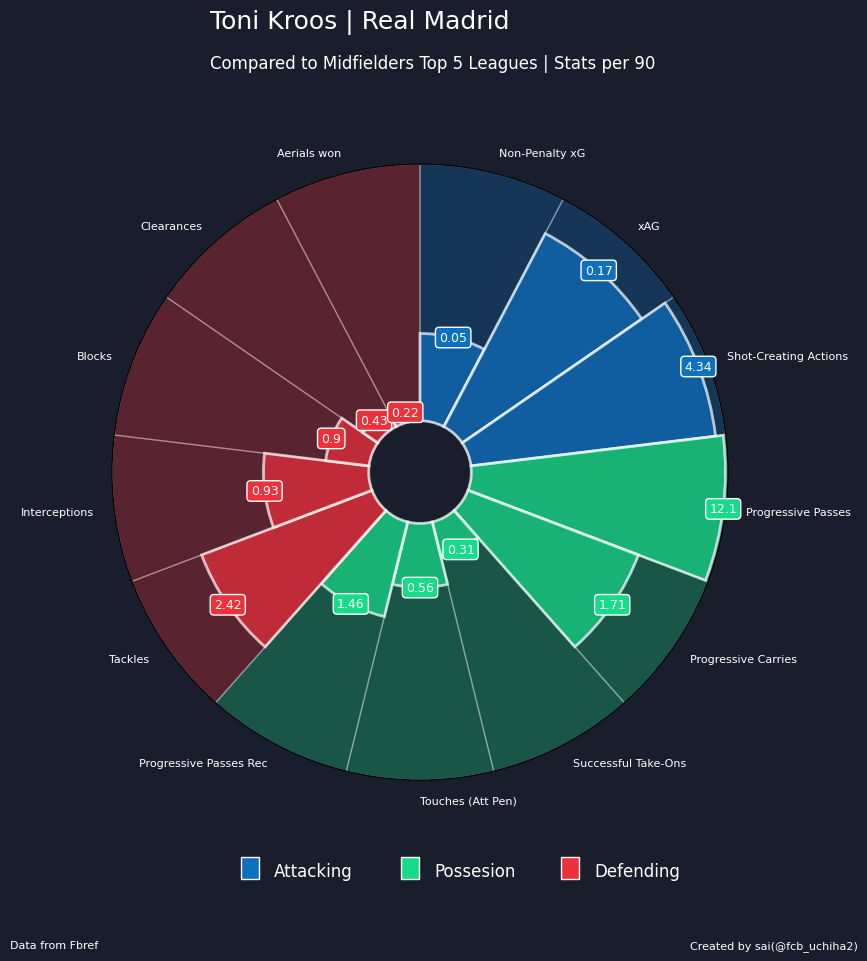

In [10]:
categories = df["Statistic"].to_list()
N = len(categories)
angles = np.linspace(0, 2 * pi, N, endpoint=False)
angles_mids = angles + (angles[1] / 2)

hole_size =20

fig = plt.figure(figsize=(8,8))

# plot_extents = 0, 10, 0, 10
fig.set_facecolor("#1A1D2C")
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_facecolor("#1A1D2C")
# ax.set_xticks(angles_mids)
# ax.set_xticklabels(categories)
# ax.xaxis.set_minor_locator(FixedLocator(angles))

plt.setp( ax.get_yticklabels(), visible=False)
plt.setp( ax.get_xticklabels(), visible=False)
ax.set_ylim(0, 100+hole_size)

values1 = df["Filler"].to_list()
ax.bar(angles_mids, values1, width=angles[1] - angles[0],
       color=df["Color"], alpha=0.3, edgecolor='w', linewidth=1, label="B",bottom =hole_size)


values0 = df["Percentile"].to_list() 
ax.bar(angles_mids, values0, width=angles[1] - angles[0],
       color=df["Color"], alpha=0.7, edgecolor='w', linewidth=2, label="A",bottom =hole_size)


for i in range(len(df)):
    ax.text(angles_mids[i],df["Percentile"][i]+hole_size, df['Per'][i], size=9, ha='center', va='center',color="w",bbox=dict(boxstyle='round',fc=df["Color"][i], ec='w'))


for i in range(N):
    angle_rad = angles_mids[i]
    if angle_rad == 0:
        ha, distance_ax = "center", 10
    elif 0 < angle_rad < pi:
        ha, distance_ax = "left", 8
    elif angle_rad == pi:
        ha, distance_ax = "center", 8
    else:
        ha, distance_ax = "right", 8
    ax.text(angle_rad, 100 + distance_ax+hole_size, df["Statistic"][i], size=8, horizontalalignment=ha, verticalalignment="center",color="w")


ax.grid(False)

fig.text(0.25,1.05,player_name+" | Real Madrid",fontsize=18,color="white")
fig.text(0.25,1,"Compared to Midfielders Top 5 Leagues | Stats per 90",fontsize=12,color="white")

fig.text(0,-0.1,"Data from Fbref",fontsize=8,color="white")
fig.text(0.85,-0.1,"Created by sai(@fcb_uchiha2)",fontsize=8,color="white")

fig.text(0.3,-0," " ,size=4, ha='center', va='center',color="w",bbox=dict(boxstyle='square,pad=1.5',fc="#0E70BF", ec='w',))
fig.text(0.33,-0.01,"Attacking" ,fontsize=12,color="white")
fig.text(0.5,-0," " ,size=4, ha='center', va='center',color="w",bbox=dict(boxstyle='square,pad=1.5',fc="#19DA89", ec='w',))
fig.text(0.53,-0.01,"Possesion" ,fontsize=12,color="white")
fig.text(0.7,-0," " ,size=4, ha='center', va='center',color="w",bbox=dict(boxstyle='square,pad=1.5',fc="#EC313A", ec='w',))
fig.text(0.73,-0.01,"Defending" ,fontsize=12,color="white")
 

plt.savefig(player_name+".jpg",dpi=1100,facecolor="#1A1D2C",bbox_inches='tight')
